# Understanding the Boston Airbnb Data

In [6]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('/Users/cemburakozyazar/Desktop/working directory/listings.csv')

In [8]:
pd.set_option('display.max_columns', None)
data.head(n=5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [9]:
# remove dollar sign and convert to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [21]:
# select relevant features
cols =  ['price', 'neighbourhood_cleansed', 'property_type', 'room_type','accommodates', 'bathrooms', 'bedrooms',
         'beds','bed_type','amenities','square_feet', 'cancellation_policy','host_is_superhost', 'number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
         'review_scores_communication','review_scores_location','review_scores_value']
data = data[cols]

In [ ]:
# change name column
data = data.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

In [22]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3585 non-null   float64
 1   neighbourhood                3585 non-null   object 
 2   property_type                3582 non-null   object 
 3   room_type                    3585 non-null   object 
 4   accommodates                 3585 non-null   int64  
 5   bathrooms                    3571 non-null   float64
 6   bedrooms                     3575 non-null   float64
 7   beds                         3576 non-null   float64
 8   bed_type                     3585 non-null   object 
 9   amenities                    3585 non-null   object 
 10  square_feet                  56 non-null     float64
 11  cancellation_policy          3585 non-null   object 
 12  host_is_superhost            3585 non-null   object 
 13  number_of_reviews 

In [23]:
data.head(n=3)

,price,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,cancellation_policy,host_is_superhost,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,250.0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,moderate,f,0,NaN,NaN,NaN,NaN,NaN,NaN
1,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,moderate,f,36,10.0,9.0,10.0,10.0,9.0,9.0
2,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,moderate,t,41,10.0,9.0,10.0,10.0,9.0,10.0


Converting amenities column into dummies

In [26]:
# Amenities, clean
data['amenities'] = data['amenities'].replace("{", '', regex=True)
data['amenities'] = data['amenities'].replace("}", '', regex=True)
data['amenities'] = data['amenities'].replace("\"", '', regex=True)

# Convert to dummies
A = data['amenities'].str.get_dummies(sep= ",")

<ipython-input-26-7e9def7d9085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amenities'] = data['amenities'].replace("{", '', regex=True)
<ipython-input-26-7e9def7d9085>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amenities'] = data['amenities'].replace("}", '', regex=True)
<ipython-input-26-7e9def7d9085>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [28]:
A.head(n=5)

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [29]:
# dropping the amenities column from the original data
data = data.drop('amenities', 1)

In [30]:
# concatenate data with amenities
df = pd.concat([data, A], axis=1)
df.head()

,price,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,cancellation_policy,host_is_superhost,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,250.0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,moderate,f,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,moderate,f,36,10.0,9.0,10.0,10.0,9.0,9.0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,moderate,t,41,10.0,9.0,10.0,10.0,9.0,10.0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,75.0,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,moderate,f,1,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,79.0,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,flexible,t,29,10.0,10.0,10.0,10.0,9.0,10.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [31]:
df = df.drop('translation missing: en.hosting_amenity_49', 1)
df = df.drop('translation missing: en.hosting_amenity_50', 1)

# Observing Price column

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

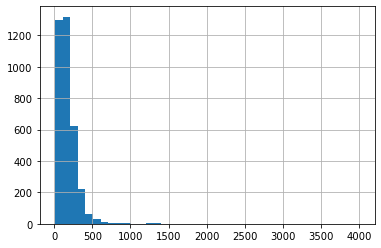

In [36]:
df['price'].hist(bins=40)
df['price'].describe()


In [38]:
df['price'].quantile(0.05)

50.0

In [39]:
df['price'].quantile(0.95)

375.0

In [42]:
#getting rid of values below 5% and above 95%
df = df[df['price']>50]
df = df[df['price']<375]

# Numerical Features

In [57]:
numeric = df[df.columns[1:19]]
numeric = numeric.select_dtypes(include=['float64', 'int64'])

In [67]:
# percentage of null values per column in numerical variables
numeric_null_pct = pd.DataFrame(numeric.isnull().sum()/numeric.shape[0]).reset_index()
numeric_null_pct.columns = ['numerical features', '% of null values']
numeric_null_pct = numeric_null_pct.sort_values(by='% of null values', ascending=False)
numeric_null_pct = numeric_null_pct.reset_index(drop=True)
numeric_null_pct

,numerical features,% of null values
0,square_feet,0.983902
1,review_scores_accuracy,0.218119
2,review_scores_location,0.217803
3,review_scores_value,0.217487
4,review_scores_checkin,0.217172
5,review_scores_cleanliness,0.216540
6,review_scores_communication,0.216540
7,bathrooms,0.003788
8,bedrooms,0.003157
9,beds,0.002841


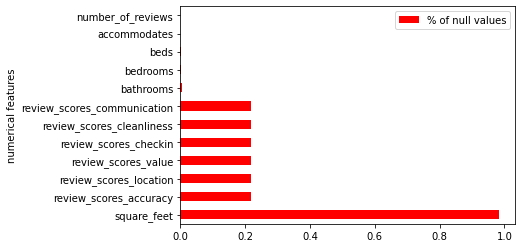

In [68]:
# plot % of null values in numercial variables
numeric_null_pct.plot.barh(x='numerical features', y='% of null values', color='red')
plt.show()

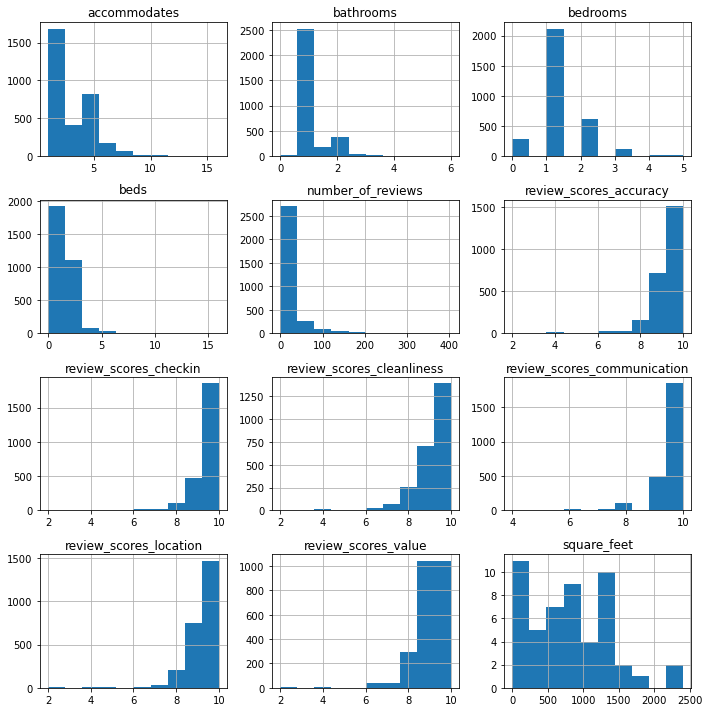

In [69]:
# histograms numerical variables
numeric.hist(figsize=(10, 10))
plt.tight_layout()

# Categorical Features

In [70]:
# select categorical features
cat = data.select_dtypes(exclude=['float64', 'int64'])
cat.head()

,neighbourhood,property_type,room_type,bed_type,cancellation_policy,host_is_superhost
0,Roslindale,House,Entire home/apt,Real Bed,moderate,f
1,Roslindale,Apartment,Private room,Real Bed,moderate,f
2,Roslindale,Apartment,Private room,Real Bed,moderate,t
3,Roslindale,House,Private room,Real Bed,moderate,f
4,Roslindale,House,Private room,Real Bed,flexible,t


In [76]:
# percentage of null values per column in categorical variables
cat_null_pct = pd.DataFrame(cat.isnull().sum()/cat.shape[0]).reset_index()
cat_null_pct.columns = ['categorical features', '% of null values']
cat_null_pct = cat_null_pct.sort_values(by='% of null values', ascending=False)
cat_null_pct = cat_null_pct.reset_index(drop=True)
cat_null_pct

,categorical features,% of null values
0,property_type,0.000837
1,neighbourhood,0.000000
2,room_type,0.000000
3,bed_type,0.000000
4,cancellation_policy,0.000000
5,host_is_superhost,0.000000


In [85]:
for i in cat.columns:
    print("---- %s -------------")
    print(cat[i].value_counts())

---- %s -------------
Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood, dtype: int64
---- %s -------------
Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Oth

# Amenities

In [90]:
amenities = df[df.columns[19:]]

In [92]:
amenities.isnull().sum()

24-Hour Check-in              0
Air Conditioning              0
Breakfast                     0
Buzzer/Wireless Intercom      0
Cable TV                      0
Carbon Monoxide Detector      0
Cat(s)                        0
Dog(s)                        0
Doorman                       0
Dryer                         0
Elevator in Building          0
Essentials                    0
Family/Kid Friendly           0
Fire Extinguisher             0
First Aid Kit                 0
Free Parking on Premises      0
Free Parking on Street        0
Gym                           0
Hair Dryer                    0
Hangers                       0
Heating                       0
Hot Tub                       0
Indoor Fireplace              0
Internet                      0
Iron                          0
Kitchen                       0
Laptop Friendly Workspace     0
Lock on Bedroom Door          0
Other pet(s)                  0
Paid Parking Off Premises     0
Pets Allowed                  0
Pets liv

In [96]:
# number of properties with each amenity
amenity = pd.DataFrame(amenities.sum()).reset_index()
amenity.columns = ['amenities', 'n observations']
amenity['proportion'] = amenity['n observations'] / data.shape[0]
amenity = amenity.sort_values(by='n observations', ascending=False)
amenity = amenity.reset_index(drop=True)
amenity

,amenities,n observations,proportion
0,Wireless Internet,3027,0.844351
1,Heating,3004,0.837936
2,Kitchen,2900,0.808926
3,Essentials,2667,0.743933
4,Smoke Detector,2571,0.717155
5,Air Conditioning,2550,0.711297
6,TV,2362,0.658856
7,Internet,2314,0.645467
8,Dryer,2188,0.610321
9,Shampoo,2185,0.609484


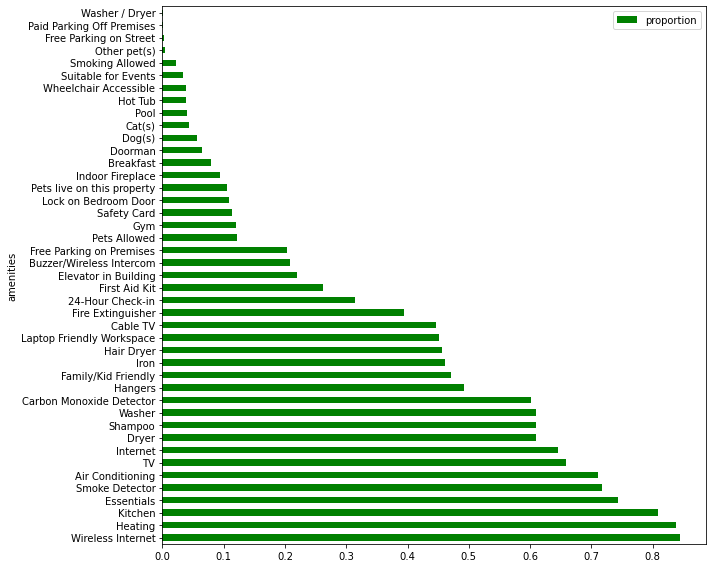

In [99]:
# plotting amenities
amenity.plot.barh(x='amenities', y='proportion', color='green', figsize=(10,8))
plt.tight_layout()
plt.show()

# Figuring out the price information of each neighbourhood

In [100]:
df

,price,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,cancellation_policy,host_is_superhost,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,250.0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,moderate,f,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1
1,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,moderate,f,36,10.0,9.0,10.0,10.0,9.0,9.0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
2,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,moderate,t,41,10.0,9.0,10.0,10.0,9.0,10.0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1
3,75.0,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,NaN,moderate,f,1,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1
4,79.0,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,NaN,flexible,t,29,10.0,10.0,10.0,10.0,9.0,10.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,69.0,Charlestown,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,NaN,strict,f,4,10.0,10.0,10.0,10.0,8.0,9.0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3581,150.0,Allston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,strict,f,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1
3582,198.0,Charlestown,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,flexible,f,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3583,65.0,Charlestown,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,strict,f,2,9.0,8.0,9.0,9.0,8.0,7.0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [197]:
# aggregates
k = df[['price','neighbourhood']]
aggregates = round(k.groupby('neighbourhood').agg(['count', 'min', 'max','median', 'mean']),2)
aggregates = aggregates.sort_values(by=[('price',   'mean')], ascending=False)
aggregates

price                             
                        count    min    max median    mean
neighbourhood                                             
Leather District            4  159.0  295.0  212.0  219.50
Chinatown                  65   80.0  361.0  219.0  217.89
South Boston Waterfront    67  115.0  361.0  200.0  217.55
Downtown                  152   60.0  365.0  213.5  214.70
Back Bay                  269   69.0  363.0  200.0  211.44
West End                   47   60.0  349.0  199.0  200.53
Fenway                    271   52.0  359.0  189.0  189.44
Beacon Hill               177   75.0  350.0  180.0  185.09
Bay Village                17   90.0  350.0  170.0  184.06
South End                 307   60.0  373.0  175.0  184.06
North End                 130   60.0  350.0  175.0  180.49
Charlestown               101   55.0  350.0  175.0  178.65
South Boston              162   57.0  350.0  150.0  163.32
Longwood Medical Area       9   60.0  350.0   84.0  138.44
Mission Hill              101   52.0  349.0  100.0  128.96
Roxbury                   122   52.0  350.0  100.0  127.07
Jamaica Plain             311   53.0  350.0  100.0  126.19
East Boston               141   56.0  359.0   99.0  123.99
Allston                   212   52.0  350.0   98.5  120.01
Brighton                  157   52.0  300.0  100.0  118.76
West Roxbury               41   55.0  349.0   95.0  114.37
Roslindale                 47   55.0  285.0   90.0  108.30
Hyde Park                  21   51.0  269.0   75.0  106.90
Dorchester                221   51.0  325.0   80.0  101.26
Mattapan                   16   59.0  169.0   75.0   89.44

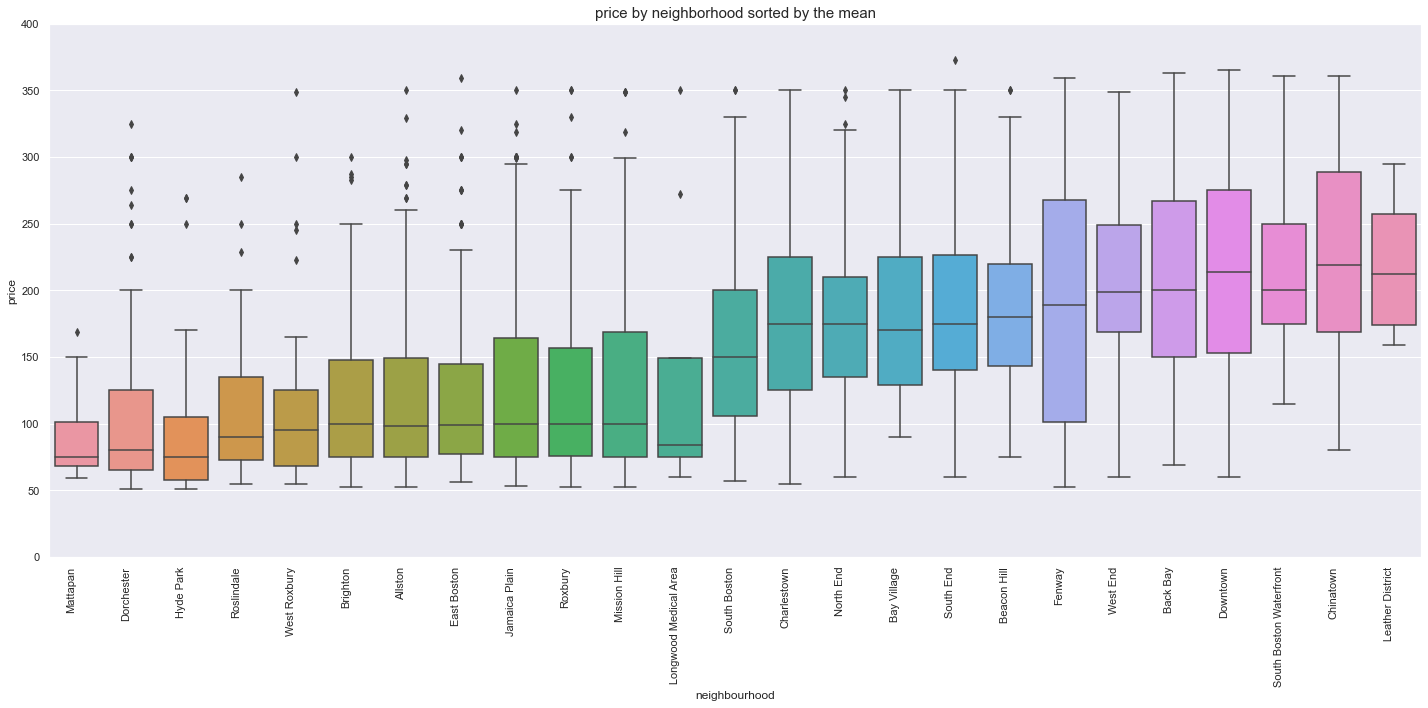

In [215]:
# boxplot price per accommodate by neighborhood sorted by the mean
grouped = df.loc[:,['neighbourhood', 'price']].groupby(['neighbourhood']).mean().sort_values(by='price')
sns.set(rc={'figure.figsize':(20,10)})
bp = sns.boxplot(x=df.neighbourhood, y=n['price'],order=grouped.index)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.ylim(0,400)
plt.title('price by neighborhood sorted by the mean', fontsize=15)
plt.tight_layout()